### 1 EDA of Superstore Sales Dataset (train.csv)

In [1]:
#data processing tools
import pandas as pd
import numpy as np

#visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# date and time processing, warnings tools
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

#dashboard construct
import streamlit as st

# 1.1 uploading data set and collecting metrics

data = pd.read_csv('train.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
# table size
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# general information
data.info()

# missed values
print("\nMissing values per column:")
print(data.isnull().sum())

# statistics for number values
data.describe()

# Unique values in object columns
print("\nUnique values in object columns:")
print(data.select_dtypes(include='object').nunique())

Rows: 9800, Columns: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null

In [3]:
# 1.2 clean data without 'Row ID','Ship Date', 'Ship Mode','Customer Name', 'Country', 'Postal Code', 'Region'

data.drop(columns=['Row ID','Ship Date', 'Ship Mode','Customer Name', 'Country', 'Postal Code', 'Region'], inplace=True)

In [4]:
# missed values check
total_missing = data.isnull().sum().sum()
print(f"Всего пропущенных значений: {total_missing}")
data.info()

Всего пропущенных значений: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9800 non-null   object 
 1   Order Date    9800 non-null   object 
 2   Customer ID   9800 non-null   object 
 3   Segment       9800 non-null   object 
 4   City          9800 non-null   object 
 5   State         9800 non-null   object 
 6   Product ID    9800 non-null   object 
 7   Category      9800 non-null   object 
 8   Sub-Category  9800 non-null   object 
 9   Product Name  9800 non-null   object 
 10  Sales         9800 non-null   float64
dtypes: float64(1), object(10)
memory usage: 842.3+ KB


In [5]:
# 1.3 Convert order date to datetime format and extract time-based features
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Year_Month'] = data['Order Date'].dt.to_period('M')

Total Sales: $2,261,536.78
Average Sale: $230.77


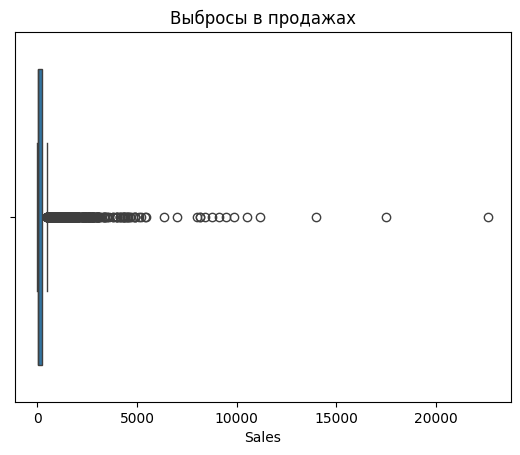

In [6]:
# 1.4 выбросы в Sales
total_sales = data['Sales'].sum()
avg_sales = data['Sales'].mean()
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sale: ${avg_sales:,.2f}")
sns.boxplot(x=data['Sales'])
plt.title("Выбросы в продажах")
plt.show()

Несколько крупных заказов резко искажают среднюю выручку, возможно стоит их анализировать отдельно.

In [7]:
# фильтруем выбросы по продажам
upper_sales = data['Sales'].quantile(0.99)
filtered_data = data[data['Sales'] <= upper_sales]
filtered_data = filtered_data[filtered_data['Sales'] >= 0]
filtered_data.drop_duplicates(inplace=True)
print(filtered_data.shape)

(9701, 14)


In [8]:
# 1.5 key metrics accounting

total_sales = filtered_data['Sales'].sum()
avg_sales = filtered_data['Sales'].mean()
total_orders = filtered_data['Order ID'].nunique()
total_customers = filtered_data['Customer ID'].nunique()
median_sales = filtered_data['Sales'].median()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sale: ${avg_sales:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Unique Customers: {total_customers}")
print(f"Median Sale: ${median_sales:,.2f}")


Total Sales: $1,814,412.90
Average Sale: $187.03
Total Orders: 4902
Unique Customers: 793
Median Sale: $52.59


Данные были очищены от выбросов по 99-му перцентилю, что позволило улучшить читаемость отчётов и повысить достоверность метрик

In [9]:
# 1.6 general statistics 
aov = filtered_data.groupby('Order ID')['Sales'].sum().mean()
print(f"average order value: {aov}")

orders_per_month = filtered_data.groupby('Year_Month')['Order ID'].nunique()
print (f"orders per month: {orders_per_month}")



average order value: 370.13727064463484
orders per month: Year_Month
2015-01     30
2015-02     28
2015-03     69
2015-04     63
2015-05     68
2015-06     64
2015-07     64
2015-08     70
2015-09    127
2015-10     77
2015-11    144
2015-12    138
2016-01     27
2016-02     35
2016-03     75
2016-04     71
2016-05     71
2016-06     66
2016-07     64
2016-08     66
2016-09    137
2016-10     86
2016-11    155
2016-12    158
2017-01     48
2017-02     45
2017-03     85
2017-04     88
2017-05    107
2017-06     95
2017-07     95
2017-08     89
2017-09    186
2017-10    103
2017-11    181
2017-12    170
2018-01     66
2018-02     52
2018-03    117
2018-04    115
2018-05    115
2018-06    129
2018-07    108
2018-08    108
2018-09    222
2018-10    144
2018-11    258
2018-12    223
Freq: M, Name: Order ID, dtype: int64


In [10]:
top_states = filtered_data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_cities = filtered_data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
print(f"top 10 states: {top_states}")
print(f"top 10 cities: {top_cities}")

top 10 states: State
California      369916.5315
New York        217562.2080
Texas           150902.5682
Washington      109331.4360
Pennsylvania     95713.3340
Illinois         73700.6050
Ohio             70348.9930
Florida          58626.2360
Virginia         51506.8600
Michigan         50421.5220
Name: Sales, dtype: float64
top 10 cities: City
New York City    177120.1880
Los Angeles      139668.3410
Seattle           92896.5280
San Francisco     91140.8960
Philadelphia      88278.4330
Houston           58376.2028
Chicago           42284.2210
San Diego         37020.1870
Columbus          35441.2610
Springfield       29263.9000
Name: Sales, dtype: float64


In [11]:
segment_avg_sale = filtered_data.groupby('Segment')['Sales'].mean().reset_index()
print(f"segment average sale: {segment_avg_sale}")
category_share = ((filtered_data.groupby('Category')['Sales'].sum() / filtered_data['Sales'].sum() * 100).reset_index())
print(f"category share: {category_share}")

segment average sale:        Segment       Sales
0     Consumer  182.533260
1    Corporate  191.476795
2  Home Office  192.681460
category share:           Category      Sales
0        Furniture  36.215168
1  Office Supplies  32.623873
2       Technology  31.160959


In [12]:
top_products = filtered_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
print(f"top 10 products: {top_products}")

top 10 products:                                         Product Name       Sales
0      Global Troy Executive Leather Low-Back Tilter  12975.3820
1         GBC DocuBind TL300 Electric Binding System  12826.9570
2                           SAFCO Arco Folding Chair  11572.7800
3  Plantronics CS510 - Over-the-Head monaural Wir...  10822.3600
4  Hon Deluxe Fabric Upholstered Stacking Chairs,...  10637.5280
5              Tennsco 6- and 18-Compartment Lockers  10076.4600
6                        Tennsco Double-Tier Lockers   9630.8560
7         Bretford Rectangular Conference Table Tops   9384.4435
8  Plantronics Savi W720 Multi-Device Wireless He...   9367.2900
9                        Tennsco Single-Tier Lockers   9158.2960


In [13]:
# Analysis of Repeat Customers Based on Order Frequency
orders_per_customer = filtered_data.groupby('Customer ID')['Order ID'].nunique()
repeat_customers_count = (orders_per_customer > 2).sum()
repeat_customers = orders_per_customer[orders_per_customer > 2]
total_customers = orders_per_customer.shape[0]

# (%)
repeat_customers_pct = (repeat_customers_count / total_customers) * 100

print(f"🔁 repeat customers count: {repeat_customers_count}")
print(f"👥 total customers: {total_customers}")
print(f"📊 repeat customers count: {repeat_customers_pct:.2f}%")

# Top of very active customers

top_customer_orders = repeat_customers[repeat_customers > 10].sort_values(ascending=False)
print(f"top active customers made more than 10 orders:{top_customer_orders}")

🔁 repeat customers count: 746
👥 total customers: 793
📊 repeat customers count: 94.07%
top active customers made more than 10 orders:Customer ID
EP-13915    17
JE-15745    13
CK-12205    13
PG-18820    13
ZC-21910    13
KD-16495    12
KB-16585    12
CS-12250    12
CL-12565    12
BP-11095    12
AH-10690    12
SH-19975    12
SJ-20125    12
RB-19465    12
RP-19390    12
LC-16885    12
NS-18640    12
EA-14035    12
DK-12835    12
PK-19075    12
KL-16645    12
HG-14965    12
CK-12595    11
BD-11320    11
BF-11170    11
BM-11650    11
CC-12220    11
CS-11950    11
JG-15160    11
JD-15895    11
CS-12355    11
Dp-13240    11
GA-14725    11
GB-14530    11
GT-14710    11
LA-16780    11
MA-17560    11
PO-18850    11
SE-20110    11
SC-20725    11
SM-20950    11
SZ-20035    11
XP-21865    11
Name: Order ID, dtype: int64


## 2 Visualisation

In [14]:
# group by month
filtered_data['Year_Month'] = filtered_data['Year_Month'].astype(str)
monthly_sales = filtered_data.groupby('Year_Month')['Sales'].sum().reset_index()

# plot 📈 Monthly Sales Trend

fig = px.line(monthly_sales, x='Year_Month', y='Sales',
              title='📈 Monthly Sales Trend',
              markers=True, color_discrete_sequence=['#636EFA'])
fig.update_layout(xaxis_title='Month', yaxis_title='Sales')
fig.show()



In [15]:
# category sales bar

category_sales = filtered_data.groupby('Category')['Sales'].sum().sort_values().reset_index()
fig = px.bar(category_sales, x='Category', y='Sales',
             title='💼 Sales by Category',
             text='Sales', color_discrete_sequence=['orange'])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(yaxis_title='Sales')
fig.show()

In [16]:
# 🏆 Top 10 Products by Sales


fig = px.bar(top_products, x='Sales', y='Product Name',
             orientation='h',
             title='🏆 Top 10 Products by Sales',
             text='Sales', color_discrete_sequence=['green'])
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [22]:
# average sales by segments

fig = px.bar(segment_avg_sale, x='Segment', y='Sales',
             title='💳 Average Sales per Segment',
             text='Sales', color_discrete_sequence=['green'])
fig.show()

In [20]:
# 📊 Category Share of Sales
fig = px.pie(category_share, names='Category', values='Sales',
             title='📊 Sales Share by Category',
             hole=0.4)
fig.update_traces(marker=dict(colors=['#636EFA', '#EF553B', '#00CC96']))
fig.show()

In [27]:
# map of sales by states

state_sales = filtered_data.groupby('State')['Sales'].sum().reset_index()

us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
state_sales['State Code'] = state_sales['State'].map(us_state_abbrev)

fig = px.choropleth(
    state_sales,
    locations='State Code',
    locationmode='USA-states',
    color='Sales',
    scope='usa',
    color_continuous_scale='Blues',  # Или 'Viridis', 'Inferno', 'Plasma', 'Magma'
    title='🗺️ Sales by US State (Gradient)'
)
fig.show()

In [28]:
filtered_data.to_csv("filtered_sales.csv", index=False)